<a href="https://colab.research.google.com/github/CamelGoong/NLP/blob/main/%5BNLP%5DChapter3_Overview_of_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1. 텍스트 분류

#Problem 2. 텍스트 유사도

유사도 측정을 위한 벡터화(TF/IDF 사용)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 바가운 비 소식 이 있습니다.", "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")
tfidf_vertorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vertorizer.fit_transform(sent) # 문장 벡터화   

In [2]:
idf = tfidf_vertorizer.idf_
print(dict(zip(tfidf_vertorizer.get_feature_names(), idf))) # 각 값들을 수치화

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '바가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.0, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Method 1. 자카드 유사도: 단어의 합집합과 교집합을 이용해서 구하는 것

Method 2. 코사인 유사도

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2]) # 첫번째 문장과 두번째 문장 비교

array([[0.17952266]])

Method 3. 유클리디언 유사도

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[1.28099753]])

In [5]:
# 유클리디언 유사도를 그냥 구하면, 위처럼 0~1 범위를 초과하는 유사도를 얻게 됨. 따라서 이를 방지하기 위해서, 각 벡터들을 L1 정규화 방법으로 Normalized한 뒤에 다시 유클리디언 유사도를 구함.
import numpy as np

def l1_normalize(v): # input값은 벡터
  norm = np.sum(v)
  return v / norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.20491229]])

Method 4. 맨해튼 유사도

In [6]:
# 맨해튼 유사도도 직전의 유클리디언 유사도와 같이 그냥 구하면 0~1 범위를 초과하는 유사도를 얻게 될 수 있으므로, L1 정규화 방법을 선행한 후에 유사도 측정
from sklearn.metrics.pairwise import manhattan_distances

manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.77865927]])

#Problem 3. 자연어 생성

대표적인 활용 분야로는 "기계번역" 분야가 있음.

#Problem 4. 기계 이해

기계가 어떤 텍스트에 대한 정보를 학습하고 사용자가 질의를 던졌을 때 그에 대해 응답하는 문제

기계 이해 모델 중 하나인 '메모리 네트워크'

자연어 처리 기술에 대한 개념이 총망라된 학습 태스크. 더욱 복잡된 모델링을 요함

1) bAbi 데이터셋: 페이스북 AI 연구팀에서 기계가 데이터를 통해 학습해서 텍스트를 이해하고 추론하는 목적에서 만들어진 데이터셋 / 총 20가지 부류의 질문과 답변으로 구성

2) SQuAD(Stanford Question Answering Dataset): 기계 이해 태스크에서 가장 유명한 데이터셋 중 하나. / 위키피디아에 있는 내용을 크라우드 소싱해서 QA 데이터셋으로 구성. / 모델 학습에 대한 평가는 정답 위치와 완벽하게 일치하는지를 보는 EM(Exact Matching)점수와 정답 위치와 겹치는지를 보는 F1점수를 기반으로 함.

+ Visual Question Answering(VQA): 기계가 텍스트가 아닌 이미지를 이해하고 질의를 던지는 태스크

#6. 데이터 이해하기

모델에 문제가 있는 경우도 있지만, 해당 문제를 잘 해결하기 위해서는 데이터 이해가 선행되어야 한다. 이러한 과정을 EDA(탐색적 데이터 분석)라고 한다. / 선입견을 철저하게 배제하고 데이터가 보여주는 수치만으로 분석을 진행해야 한다.

In [7]:
# 영화리뷰 데이터 불러오기
import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

data_set = tf.keras.utils.get_file(
    fname = "imdb.tar.gz",
    origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract = True
)

84140032/84125825 [==============================] - 10s 0us/step


In [14]:
# txt 형태의 데이터 -> 판다스의 데이터프레임 으로 변환하기 위해서 새로운 함수를 정의

# 함수 1) 리뷰 텍스트를 불러오는 함수
def directory_data(directory):
  data = {}
  data["review"] = []

  for file_path in os.listdir(directory):
    with open(os.path.join(directory, file_path), "r") as file:
      data["review"].append(file.read())
  
  return pd.DataFrame.from_dict(data)


In [15]:
# 함수 2) 폴더 이름을 지정하면 앞에서 설명한 directory_data 함수를 호출하는데, pos 폴더에 접근할지 neg 폴더에 접근할지를 통해 각각의 데이터프레임을 반환받음.
# 긍정은 1, 부정은 0으로 만들고 데이터프레임을 통해 연동

def data(directory):
  pos_df = directory_data(os.path.join(directory, "pos"))
  neg_df = directory_data(os.path.join(directory, "neg"))
  pos_df['sentiment'] = 1
  neg_df['sentiment'] = 0
  
  return pd.concat([pos_df, neg_df])

In [16]:
# 위의 두 함수를 실제로 호출해서 판다스 데이터프레임을 반환
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [18]:
# 판다스 데이터프레임이 잘 만들어졌는지 확인
train_df.head()

,review,sentiment
0,This movie is now appearing on digital TV at l...,1
1,"I saw ""Mystery Men"" on my birthday in 1999 whi...",1
2,When two writers make a screenplay of a horror...,1
3,"Although well past the target audience, I've a...",1
4,How can a movie that features the singing of C...,1


In [19]:
# 데이터프레임으로부터 리뷰 문장 리스트를 가져오는 함수 만들기

reviews = list(train_df['review'])

In [23]:
# 문자열 문자 리스트를 토크나이징
tokenized_reviews = [r.split() for r in reviews]

#토크나이징된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

# 토크나이징된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

위의 사전 준비 작업을 토대로 데이터 분석 진행

Text(0, 0.5, 'Number of Reviews')

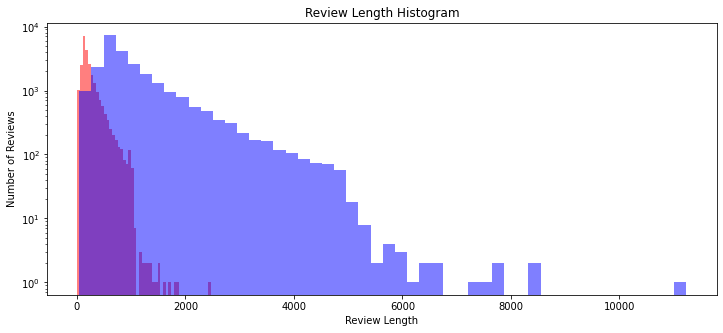

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))
plt.hist(review_len_by_token, bins = 50, alpha = 0.5, color = 'r', label = 'word')
plt.hist(review_len_by_eumjeol, bins = 50, alpha = 0.5, color = 'b', label = 'alphabet')
plt.yscale('log',nonposy = 'clip')
plt.title('Review Length Histogram')
plt.xlabel("Review Length")
plt.ylabel('Number of Reviews')

In [30]:
# 데이터 분포를 통계치로 수치화
import numpy as np

print('문장 최대 길이:{}'.format(np.max(review_len_by_token)))
print('문장 최소 길이:{}'.format(np.min(review_len_by_token)))
print('문장 평균 길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token))) 

문장 최대 길이:2470
문장 최소 길이:10
문장 평균 길이: 233.79
문장 길이 표준편차: 173.73


{'boxes': [<matplotlib.lines.Line2D at 0x7f49bb9609d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f49bb9c21d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f49bb945dd0>],
 'means': [<matplotlib.lines.Line2D at 0x7f49bb9b4510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f49bb9c2690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f49bb95b310>,
  <matplotlib.lines.Line2D at 0x7f49bb960050>]}

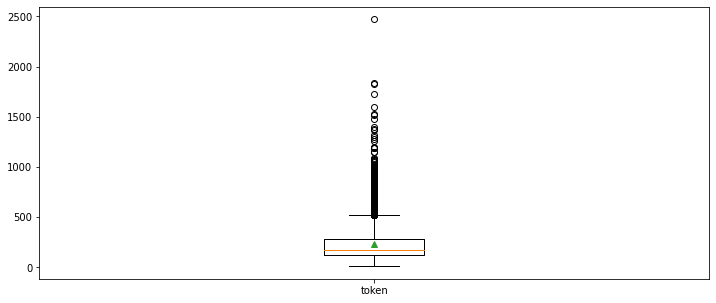

In [33]:
# 박스플롯 그리기
plt.figure(figsize = (12,5))
plt.boxplot([review_len_by_token], labels = ['token'], showmeans = True)

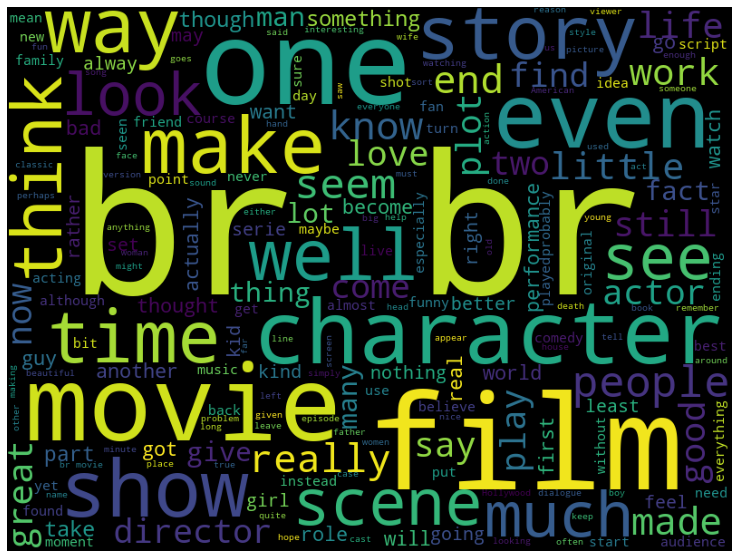

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800,
                     height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


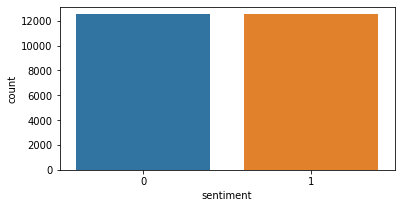

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])